In [77]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import tqdm

from generation.dataset.signals_dataset import SignalsDataset

In [188]:
signals_dataset = SignalsDataset()
signals = signals_dataset.signals
noises = signals_dataset.noises

In [75]:
def get_denoise_mse(signal, pad_size=17):
    def denoise(signal):
        pool = nn.AvgPool1d(pad_size, 1)
        signal_tensor = torch.from_numpy(sample)
        signal_tensor = signal_tensor.unsqueeze(0).unsqueeze(0)
        denoised = pool(signal_tensor)
        denoised = denoised.squeeze().numpy()
        return denoised

    denoised = denoise(signal)
    signal = signal[pad_size//2 - 1:-pad_size//2]
    mse = np.sum((denoised - signal)**2)
    return mse

In [79]:
mse_scores = []
for idx in tqdm.tqdm(range(len(signals_dataset))):
    sample = noises[0][idx]
    mse = get_denoise_mse(sample)
    mse_scores.append(mse)

100%|██████████| 8310/8310 [00:02<00:00, 3260.81it/s]


In [182]:
len(np.nonzero(np.array(mse_scores) < 0.00002153657744)[0])

0

In [183]:
len(np.nonzero(np.array(mse_scores) < 0.00002153657745)[0])

3486

In [185]:
np.nonzero(np.array(mse_scores) < 0.00002153657745)[0]

array([   3,    4,    5, ..., 8307, 8308, 8309])

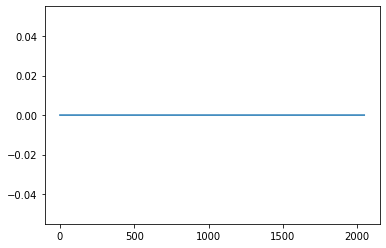

In [190]:
plt.plot(signals[0][3])

In [184]:
mse_scores[3]

2.1536577446909057e-05

In [186]:
mse_scores[8309]

2.1536577446909057e-05

(array([931., 712., 490., 419., 318., 231., 191., 157., 130., 114.]),
 array([0.001 , 0.0029, 0.0048, 0.0067, 0.0086, 0.0105, 0.0124, 0.0143,
        0.0162, 0.0181, 0.02  ]),
 <a list of 10 Patch objects>)

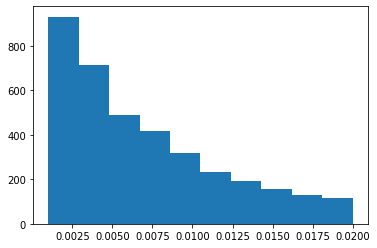

In [119]:
plt.hist(mse_scores, range=(0.001, 0.02))

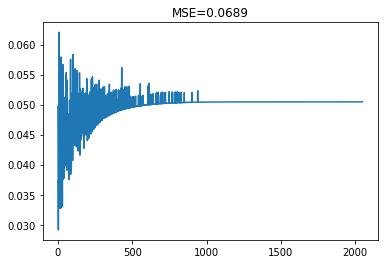

In [109]:
noise = noises[0][56]
plt.title(f"MSE={round(get_denoise_mse(noise), 4)}")
plt.plot(noise)
plt.show()

In [ ]:
class Classifeir(nn.Module):